# **Bootcamp Ciencia de Datos e Inteligencia Artificial**
# **Módulo 6. Procesamiento de lenguaje natural**
## **Semana 22. Word embbeding**

¡Hola! Te damos la bienvenida a la semana 22. Durante esta semana comprenderás e implementarás la incrustación de palabras con ML, además, dominarás el modelo de Word2Vec para Word Embedding. Por último, aprenderás a usar la representación de palabras en un modelo de Word Embedding.

Revisa el contenido con especial atención, haz tu copia y comienza a practicar. De esa manera surgirán dudas que podrás resolver con tu *coach* el día de tu clase.

# Word embbeding

La **incrustación de palabras**, mejor conocida por su nombre en inglés (**_word embeeding_**), es la representación vectorial con números reales ($\mathbb{R}$) de palabras dentro de un vocabulario, es decir, es la transformación de palabras en vectores numéricos.

El **_Word Embbeding_** tiene diversas aplicaciones en el procesamiento de Lenguaje Natural o **NLP** (_Natural Language Processing_, por sus siglas en inglés), ya sea para el análisis de sentimiento, la clasificación de texto o algún otro modelo de **NLP**. Este paso mejora la precisión de dichas herramientas, dado que permite añadir información exterior y brinda mayor contexto al significado de las palabras analizadas.

Cada palabrada dada en un idioma específico puede representarse como un conjunto numérico, es decir, se trata de un vector. Estos vectores pueden tener $n$ dimensones enfocadas en conocer el siginificado de tales vocablos y, para conseguirlo, les atribuye un valor. Dicho de otra manera, imagina que tienes un diccionario que, en lugar de incluir un significado, ofrece un vector o una serie de números, de manera que las palabras similares tendrán valores semejantes, mas no idénticos.

Estas comparaciones utilizan determinado código y una nueva serie de funciones especializada en la vectorización de palabras conocidas como `Word2Vec`. Esta recibe su nombre por su parecido al enunciado en inglés _word to vector_ (palabra a vector) y se incluye en el paquete `gensim`.

El primer paso consiste en importar esta paquetería. Si por alguna razón **Google Colab** no la detecta, será necesario instalarla con la siguiente función:
```python
!pip install gensim
```

Si ya tenías esta paquetería y ejecutas la línea de código anterior, esta se descargará de nuevo, pero descuida, no afectará al código.

Primero, se importan `gensim` y `Word2Vec`. En este punto es necesario recalcar que se ha importado `Word2Vec`. Observa cuáles son las letras mayúsculas, pues existe una clase similar que incluye todo en minúsculas. Recuerda que **Python** sabe diferenciar entre mayúsculas y minúsculas.

In [1]:
# !pip install gensim

In [2]:
import gensim
from gensim.models import Word2Vec

C:\Users\Diego\anaconda3\envs\gpu\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


A continuación, se importan las paqueterías utilizadas para manipular _arrays_ y _dataframes_.

In [3]:
import pandas as pd
import numpy as np

Es importante comenzar con frases sencillas, las cuales van a "tokenizarse" para su mejor entendimiento.

In [4]:
presentacion = [
    ['mi', 'nombre', 'ser', 'antonio'],
    ['mi', 'tener', '28', 'años', 'y', 'ser', 'cientifico', 'de', 'datos'],
    ['mi', 'pelicula', 'favorita', 'ser', 'django'],
    ['mi', 'gustar', 'el', 'futbol', 'y', 'el' ,'americano'],
    ['mi', 'equipo', 'favorito', 'ser', 'liverpool'],
    ['mi', 'gustar', 'la', 'comida', 'japonesa']
]

Seguro notaste que las palabras están escritas de manera básica y sin conjugaciones, debido a que esto hace más eficientes los procesos de NLP.

Este ejemplo es una lista de listas, muy común en los conjuntos de entrenamiento de este tipo de información.

Este modelo recibirá el nombre de `model_mini`. Para hacerlo se utiliza la clase `Word2Vec`, la cual solicita tres argumentos:
- `sentences`: se indican las listas de palabras limpias y procesadas.
- `min_count`: señala el mínimo de apariciones de una palabra para considerarla para vectorizar. Dado que se procesa un número amplio de palabras, `Word2Vec` solo toma algunas repetidas ciertas veces. Así, al decir que el mínimo es `1`, implica que todas las palabras tendrán su respectivo vector.
- `size`: es el tamaño del vector, es decir, los números que contiene cada _array_. Aunque su indicación no es obligatoria, en este ejemplo se anotará un tamaño de `10`.

In [5]:
model_mini = Word2Vec(sentences = presentacion, min_count= 1, vector_size= 10)
print(model_mini)

Word2Vec<vocab=24, vector_size=10, alpha=0.025>


Luego de entrenar el modelo, es posible averiguar algunos detalles mediante el argumeto `.wv` (del inglés _Word Vector_).

Si se indican una o más palabras dentro de los enunciados, se imprimirá el vector diseñado. En este caso, se tomará como ejemplo la palabra `'fútbol'`, aunque puedes replicarlo con alguna otra.

In [6]:
print(model_mini.wv['futbol'])

[-0.03704398 -0.08742675  0.05449758  0.06504529 -0.00776462 -0.06716229
 -0.07088374 -0.02489532  0.05132244 -0.03667898]


El vector resultante tiene una longitud de `10`, que coincide con el argumento `size= 10` señalado durante el entrenamiento del modelo.

A continuación, se utiliza `.key_to_index` para observar los todas las palabras que generaron algún tipo de vector.

In [7]:
#from gensim.models import KeyedVectors
model_mini.wv.key_to_index

{'mi': 0,
 'ser': 1,
 'el': 2,
 'gustar': 3,
 'y': 4,
 'datos': 5,
 'nombre': 6,
 'antonio': 7,
 'tener': 8,
 '28': 9,
 'años': 10,
 'cientifico': 11,
 'de': 12,
 'japonesa': 13,
 'comida': 14,
 'favorita': 15,
 'django': 16,
 'futbol': 17,
 'americano': 18,
 'equipo': 19,
 'favorito': 20,
 'liverpool': 21,
 'la': 22,
 'pelicula': 23}

In [8]:
print(model_mini.wv['cientifico'])

[-0.00410083 -0.08371338 -0.05601967  0.07103731  0.0335198   0.07227336
  0.06802097  0.07530955 -0.03785921 -0.00559268]


Si únicamente se desea saber el índice y no conocer todo el objeto, entonces se escribe:

In [9]:
list(model_mini.wv.index_to_key)

['mi',
 'ser',
 'el',
 'gustar',
 'y',
 'datos',
 'nombre',
 'antonio',
 'tener',
 '28',
 'años',
 'cientifico',
 'de',
 'japonesa',
 'comida',
 'favorita',
 'django',
 'futbol',
 'americano',
 'equipo',
 'favorito',
 'liverpool',
 'la',
 'pelicula']

En seguida, se aplican conocimientos en `numpy` para observar todos los vectores generados. Recuerda que se trata de un ejemplo muy pequeño, donde además se solicitaron vectores de tamaño `10`, aunque en la aplicación real  el número y tamaño de los vectores aumenta considerablemente. Toma esto en consideración en caso de que quieras utilizar `print` para ver los datos.

Para usar el código, este se asigna a un objeto llamado `X_mini`

In [10]:
X_mini = model_mini.wv[model_mini.wv.index_to_key]
X_mini

array([[-0.00536227,  0.00236431,  0.0510335 ,  0.09009273, -0.0930295 ,
        -0.07116809,  0.06458873,  0.08972988, -0.05015428, -0.03763372],
       [ 0.07380505, -0.01533471, -0.04536613,  0.06554051, -0.0486016 ,
        -0.01816018,  0.0287658 ,  0.00991874, -0.08285215, -0.09448818],
       [ 0.0731664 ,  0.05066232,  0.06769606,  0.007573  ,  0.06367437,
        -0.03410163, -0.00944201,  0.05782584, -0.07535953, -0.03937403],
       [-0.07507457, -0.0093028 ,  0.09546229, -0.07322591, -0.02321804,
        -0.01942166,  0.08078457, -0.05923115,  0.00039007, -0.04752908],
       [-0.09602271,  0.05008184, -0.08755569, -0.04392126, -0.00033126,
        -0.00298307, -0.07662516,  0.09615408,  0.04980484,  0.09231248],
       [-0.08158551,  0.04491206, -0.04139107,  0.00820952,  0.08504539,
        -0.04461534,  0.04523471, -0.06781939, -0.03549725,  0.09402893],
       [-0.01577653,  0.00321372, -0.0414063 , -0.07682689, -0.01508008,
         0.02469795, -0.00888027,  0.05533662

Las palabras se transformaron en un diagrama y dado que son vectores de diez dimensiones, es necesario reducir las dimensiones. Para hacerlo, se utiliza `PCA` de `sklearn`.

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 2) #n_component es la cantidad de dimensiones que necesitamos.
X_mini_2d = pca.fit_transform(X_mini)
X_mini_2d

array([[ 1.13607422e-01,  1.33065805e-01],
       [ 4.83740941e-02,  1.43567711e-01],
       [ 8.28460380e-02,  4.22212556e-02],
       [ 9.33657214e-02, -5.42519838e-02],
       [-6.70645609e-02, -9.61256176e-02],
       [ 4.51308768e-03, -1.18940987e-01],
       [-4.37545441e-02, -1.48262810e-02],
       [ 2.82830000e-02, -1.05171129e-02],
       [ 1.65448058e-02,  1.74753275e-02],
       [-3.78030762e-02, -9.28011835e-02],
       [ 1.47317499e-01, -1.72008220e-02],
       [-4.61822301e-02,  9.86115858e-02],
       [-3.47606130e-02, -5.16716875e-02],
       [-1.37106746e-01,  2.27925032e-02],
       [-1.31105185e-01,  7.99051672e-02],
       [-1.13986380e-01,  1.16207533e-01],
       [-7.27570280e-02, -1.24026455e-01],
       [ 8.14684033e-02,  1.14635164e-02],
       [ 8.43956694e-02, -1.24474749e-01],
       [-2.10795980e-02, -2.95940461e-03],
       [-7.15524554e-02, -3.80821601e-02],
       [ 1.37765288e-01,  3.54045853e-02],
       [ 4.13515918e-05, -4.49404083e-02],
       [-6.

Ahora, se aplica un sencillo _scatter plot_.

In [12]:
import matplotlib.pyplot as plt

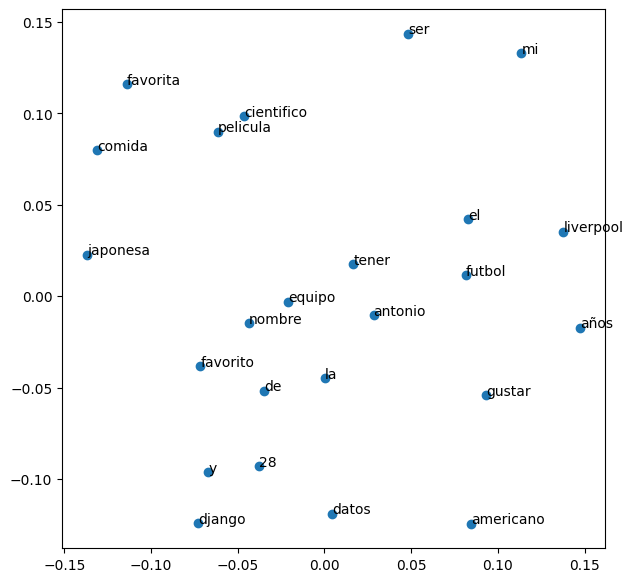

In [13]:
plt.figure(figsize= (7,7))
plt.scatter(X_mini_2d[:, 0], X_mini_2d[:, 1])
words = list(model_mini.wv.index_to_key)

for i, word in enumerate(words):
   plt.annotate(word, xy=(X_mini_2d[i, 0], X_mini_2d[i, 1]))

plt.show()

En la imagen anterior se observa que las palabras similares suelen estar juntas; en contraparte, las distintas se encuentran más lejanas entre sí. Este ejemplo aborda una serie pequeña y es una representación bidimensional de los escenarios reales con más dimensiones.
Ahora, para saber cuáles palabras tienen un significado más cercano a otra (por ejemplo, a `'pelicula'`), existe un método para obtener la respuesta rápidamente: `most_similar`

In [14]:
model_mini.wv.most_similar(['pelicula'])

[('comida', 0.631368100643158),
 ('ser', 0.41193631291389465),
 ('favorita', 0.35338476300239563),
 ('nombre', 0.3428654074668884),
 ('japonesa', 0.2823784649372101),
 ('cientifico', 0.21580740809440613),
 ('mi', 0.1605488657951355),
 ('y', 0.061490532010793686),
 ('equipo', 0.053066276013851166),
 ('futbol', 0.040249329060316086)]

In [15]:
model_mini.wv.most_similar(['django'])

[('datos', 0.5917850732803345),
 ('americano', 0.4258928894996643),
 ('y', 0.34227845072746277),
 ('la', 0.3142183721065521),
 ('gustar', 0.2893202602863312),
 ('japonesa', 0.2813149690628052),
 ('comida', 0.1897796243429184),
 ('nombre', 0.16644424200057983),
 ('28', 0.15498636662960052),
 ('favorito', 0.1518729031085968)]

In [16]:
model_mini.wv.most_similar(['gustar'])

[('americano', 0.7669098377227783),
 ('equipo', 0.39199337363243103),
 ('liverpool', 0.3191201984882355),
 ('antonio', 0.29440855979919434),
 ('django', 0.2893202602863312),
 ('la', 0.2523331046104431),
 ('tener', 0.20688751339912415),
 ('años', 0.19952188432216644),
 ('mi', 0.10502881556749344),
 ('futbol', 0.09506480395793915)]

In [17]:
model_mini.wv.most_similar(['americano'])

[('gustar', 0.7669097781181335),
 ('django', 0.4258929491043091),
 ('datos', 0.30376502871513367),
 ('antonio', 0.24738448858261108),
 ('años', 0.21395498514175415),
 ('futbol', 0.18092255294322968),
 ('28', 0.14397504925727844),
 ('equipo', 0.04996214807033539),
 ('la', 0.04436001926660538),
 ('liverpool', -0.009313303045928478)]

In [18]:
model_mini.wv.most_similar(['japonesa'])

[('favorita', 0.67023766040802),
 ('comida', 0.5146751999855042),
 ('de', 0.43467581272125244),
 ('pelicula', 0.2823784649372101),
 ('django', 0.28131499886512756),
 ('nombre', 0.22021909058094025),
 ('cientifico', 0.20973606407642365),
 ('la', 0.19822947680950165),
 ('y', 0.11157968640327454),
 ('equipo', 0.09980560094118118)]

In [19]:
model_mini.wv.most_similar(['liverpool'])

[('años', 0.7885133028030396),
 ('el', 0.6215400099754333),
 ('la', 0.5371708273887634),
 ('mi', 0.5109052658081055),
 ('gustar', 0.3191201686859131),
 ('cientifico', 0.28464171290397644),
 ('de', 0.2716566324234009),
 ('ser', 0.14064644277095795),
 ('futbol', 0.13855746388435364),
 ('antonio', 0.1382366120815277)]

Observa que la ampliación se realiza sobre el primer modelo (`model_mini`) y no sobre el que tiene dimensiones reducidas.

En este caso, la palabra `'pelicula'` tiene mayor similitud con `'28'`, con una certeza del 0.674264, seguida por `'antonio'` y `'favorito'`.

La utilidad de este tipo de ejercicios se observa en casos mayores. Para dimensionarlo, se utilizará `globe-twitter-25`, un modelo de 2 mil millones de tweets en varios idiomas, incluido el español, entrenado y guardado en el repositorio de `gensim`.

Para acceder a él se importa una librería de `gensim` y se asigna un objeto con dicho modelo.

> **NOTA**: Considera que el modelo pesa 104.8MB, así que puede demorar un poco en ejecutarse.

In [20]:
import gensim.downloader
example = gensim.downloader.load('glove-twitter-25')

Ahora, se analizarán las palabras más similares a `'amigo'`, `'millonario'` y `'python'`.

In [21]:
example.most_similar('amigo')

[('querido', 0.9157805442810059),
 ('amor', 0.9084493517875671),
 ('tal', 0.8987413048744202),
 ('como', 0.8945374488830566),
 ('claro', 0.8913514018058777),
 ('colega', 0.889187753200531),
 ('bonito', 0.8887455463409424),
 ('todo', 0.8883935809135437),
 ('amiga', 0.8870384097099304),
 ('diga', 0.8802276849746704)]

In [22]:
example.most_similar('millonario')

[('multimillonario', 0.8197100162506104),
 ('futbolista', 0.8027464151382446),
 ('delantero', 0.8003640174865723),
 ('deportista', 0.7990654706954956),
 ('peruano', 0.7978659868240356),
 ('fanatico', 0.7928324937820435),
 ('discapacitado', 0.7899059057235718),
 ('inmigrante', 0.7888672947883606),
 ('chileno', 0.7882347106933594),
 ('hondureño', 0.7869491577148438)]

In [23]:
example.most_similar('python')

[('matrix', 0.8728230595588684),
 ('electronic', 0.858686625957489),
 ('osx', 0.858174741268158),
 ('silicon', 0.8497913479804993),
 ('fusion', 0.8460885286331177),
 ('instruments', 0.8459755778312683),
 ('charcoal', 0.8439996838569641),
 ('lightroom', 0.842175304889679),
 ('slider', 0.8419185876846313),
 ('illustrator', 0.8409003019332886)]

In [24]:
example.most_similar('chile')

[('colombia', 0.9749589562416077),
 ('argentina', 0.9523670077323914),
 ('mexico', 0.951471209526062),
 ('ecuador', 0.9401147961616516),
 ('paraguay', 0.9388746023178101),
 ('méxico', 0.9284105896949768),
 ('monterrey', 0.9209353923797607),
 ('guatemala', 0.9203668236732483),
 ('perú', 0.9189109802246094),
 ('uruguay', 0.9149983525276184)]

In [25]:
example.most_similar('bootcamp')

[('sessions', 0.9001991748809814),
 ('banquet', 0.8856373429298401),
 ('pre-show', 0.8696349859237671),
 ('kickboxing', 0.8691214919090271),
 ('masterclass', 0.8553981781005859),
 ('session', 0.84486985206604),
 ('crossfit', 0.8413044810295105),
 ('pratice', 0.8364756107330322),
 ('invitational', 0.8323386311531067),
 ('wod', 0.8304573893547058)]

## Ponte a prueba
Intenta usar alguna otra palabra y observa los resultados. ¿Tienen coherencia?¿Por qué piensas que el algoritmo estableció dichas palabras como similares? ¿Encuentras alguna aplicación útil de este método, como en el análisis del discurso de un político o en el chat de un grupo de WhatsApp?

#### **Ponte a prueba 2**

**Visualización de Palabras Similares Basadas en Vectores de Palabras**

Usando el modelo glove-twitter-25 y la palabra clave "estudiar", realiza las siguientes tareas:

- Carga el modelo y encuentra las 10 palabras más similares a "estudiar".
- Representa estas palabras y sus similitudes en un gráfico de barras.
- Analiza el gráfico y reflexiona sobre las relaciones entre las palabras.

In [26]:
example.most_similar('estudiar')

[('tarea', 0.9245120882987976),
 ('clase', 0.9237799048423767),
 ('clases', 0.9230238795280457),
 ('rendir', 0.9117064476013184),
 ('empezar', 0.8936383724212646),
 ('trabajar', 0.8875538110733032),
 ('paja', 0.8869296312332153),
 ('estudiando', 0.8865811824798584),
 ('aprobar', 0.8851075768470764),
 ('repasar', 0.8835597634315491)]

In [27]:
# Importa las librerías necesarias
import gensim.downloader
import matplotlib.pyplot as plt

In [28]:
# 1. Carga el modelo y encuentra las 10 palabras más similares a "estudiar"
model = gensim.downloader.load('glove-twitter-25')
similar_words = model.most_similar('estudiar', topn=10)

# Extraer palabras y similitudes
words = [item[0] for item in similar_words]
similarities = [item[1] for item in similar_words]

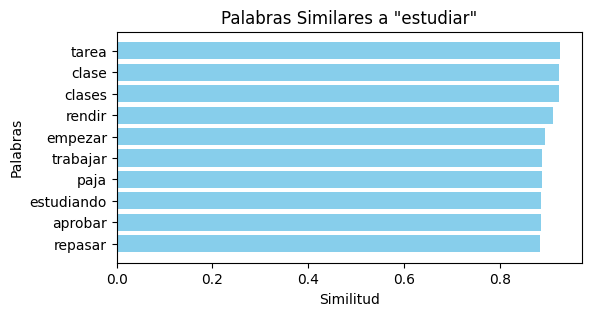

In [29]:
# 2. Representa estas palabras y sus similitudes en un gráfico de barras
plt.figure(figsize=(6, 3))
plt.barh(words, similarities, color='skyblue')
plt.xlabel('Similitud')
plt.ylabel('Palabras')
plt.title('Palabras Similares a "estudiar"')
plt.gca().invert_yaxis()
plt.show()

## Ejemplo de base de datos de comentarios de Amazon

Para hacer el análisis, es necesario instalar una librería llamada `datasets`,  usada por varios proyectos para hospedar _datasets_ y modelos entrenados.

In [30]:
# !pip install datasets

Una vez instalada, se emplea la función `load_data` y se indica que se desea un _dataset_ especial de Amazon en idioma español.

> **NOTA**: considera que el archivo pesa más de 80 MB.

In [31]:
train_df = pd.read_csv('train.csv')
train_df.head()

,Unnamed: 0,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,0,de_0203609,product_de_0865382,reviewer_de_0267719,1,Armband ist leider nach 1 Jahr kaputt gegangen,Leider nach 1 Jahr kaputt,de,sports
1,1,de_0559494,product_de_0678997,reviewer_de_0783625,1,In der Lieferung war nur Ein Akku!,EINS statt ZWEI Akkus!!!,de,home_improvement
2,2,de_0238777,product_de_0372235,reviewer_de_0911426,1,"Ein Stern, weil gar keine geht nicht. Es hande...",Achtung Abzocke,de,drugstore
3,3,de_0477884,product_de_0719501,reviewer_de_0836478,1,"Dachte, das wären einfach etwas festere Binden...",Zu viel des Guten,de,drugstore
4,4,de_0270868,product_de_0022613,reviewer_de_0736276,1,Meine Kinder haben kaum damit gespielt und nac...,Qualität sehr schlecht,de,toy


In [32]:
train_df.shape

(1200000, 9)

In [33]:
# seleccionamos solo las filas en español
train_df['language'].unique()

array(['de', 'en', 'es', 'fr', 'ja', 'zh'], dtype=object)

In [59]:
# seleccionamos solo las filas en español
train_df['language'].value_counts()

language
es    200000
Name: count, dtype: int64

In [34]:
# Filtrar por idioma español 
train_df = train_df[train_df['language'] == 'es']
train_df.head(10)

,Unnamed: 0,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
400000,400000,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics
400001,400001,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics
400002,400002,es_0811721,product_es_0474543,reviewer_es_0929213,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore
400003,400003,es_0359921,product_es_0656090,reviewer_es_0224702,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,es,wireless
400004,400004,es_0068940,product_es_0662544,reviewer_es_0224827,1,Llega tarde y co la talla equivocada,Devuelto,es,shoes
400005,400005,es_0779978,product_es_0103315,reviewer_es_0304973,1,Jamás me llegó y el vendedor nunca contacto co...,Jamás me llegó,es,home
400006,400006,es_0591840,product_es_0880915,reviewer_es_0642702,1,"El paraguas es de muy mala calidad,da la sensa...",Horroroso!!!,es,luggage
400007,400007,es_0173297,product_es_0814677,reviewer_es_0895784,1,Tuve que devolverla porque al ser triangular n...,Poco funcional,es,office_product
400008,400008,es_0101300,product_es_0654228,reviewer_es_0789283,1,Estoy esperando despues de protestar varias ve...,No me llego,es,electronics
400009,400009,es_0487007,product_es_0877793,reviewer_es_0986278,1,"Defectuoso. En apariencia muy bien producto, p...","Mala calidad, defectuoso",es,kitchen


Para acceder exclusivamente a los archivos se utiliza el siguiente código, pues la descarga está seleccionada en pequeños modulos y únicamente se desea acceder a uno.

In [49]:
train_df['review_body'].head()

400000    Nada bueno se me fue ka pantalla en menos de 8...
400001    Horrible, nos tuvimos que comprar otro porque ...
400002    Te obligan a comprar dos unidades y te llega s...
400003    No entro en descalificar al vendedor, solo pue...
400004                 Llega tarde y co la talla equivocada
Name: review_body, dtype: object

A continuación se presentan los cinco primeros enunciados sobre lo que escribieron los clientes. Recuerda que son enunciados _sic erat scriptum_.

In [37]:
# df[0:6]

A continuación, se realiza la limpieza de las palabras. Para hacerlo, se toman como bases la librería `unidecode`, que transforma las letras a un método único (elimina acentos), y `re`, especificamente su función `.sub`, que hace sustituciones.

Nota: para importar `unidecode` se utilizan las funciones **pip**.

In [38]:
# !pip install unidecode

A continuación, se importa `unidecode` y se utiliza la librería `re` (_regular expression_), la cual está por default en **Python** y permite realizar sustituciones.

In [39]:
import unidecode
import re

Para la limpieza de datos se utliza una lista vacía, a la cual se incluyen los valores.

Para hacerlo, se aplica un bucle que examina enunciado por enunciado y ejecuta los siguientes cinco pasos:
1. Convertir los textos a minúsculas con `.lower()`.
2. Eliminar con `unidecode.unidecode()` los acentos y algunas letras extrañas como $ç$ o $ñ$.
3. Remover símbolos de puntuación con `re.sub`, que hace sustituciones por espacios vacíos.
4. Quitar todos los símbolos como signos de interrogación, puntos, comas, etcétera.
5. Remover los dígitos.

In [50]:
import re
import unidecode
import pandas as pd

# crear una lista
texto_limpio = []

# Iterar sobre la columna 'review_body'
for desc in train_df['review_body']:
    # Convertir a minúscula
    desc = desc.lower()
    
    # Quitar acentos
    desc = unidecode.unidecode(desc)
    
    # Remover puntuación
    desc = re.sub('[^a-zA-Z]', ' ', desc)
    
    # Remover símbolos
    desc = re.sub("&lt;/?.*?&gt;", " ", desc)
    
    # Remover dígitos y caracteres especiales
    desc = re.sub("(\\d|\\W)+", " ", desc)
    
    texto_limpio.append(desc)

# Agregar los textos limpios como nueva columna al DataFrame
train_df['texto_limpio'] = texto_limpio

Se revisarán únicamente los cinco primeros textos por practicidad. Presta especial atención a la forma de redactarlos, pues esta es la forma correcta en que `Word2Vec` lo procesará.

In [51]:
texto_limpio[0:6]

['nada bueno se me fue ka pantalla en menos de meses y no he recibido respuesta del fabricante',
 'horrible nos tuvimos que comprar otro porque ni nosotros que sabemos ingles ni un informatico despues de una hora fue capaz de instalarlo',
 'te obligan a comprar dos unidades y te llega solo una y no hay forma de reclamar una autentica estafa no compreis ',
 'no entro en descalificar al vendedor solo puedo decir que tras dos meses de espera sigo sin el producto y tuve que contactar con amazon para reclamar su reembolso amazon un se hace cargo del problema pero yo e desembolsado mi dinero y en dos meses me lo devuelven perdida de tiempo total sin palabras y ustedes deciden',
 'llega tarde y co la talla equivocada',
 'jamas me llego y el vendedor nunca contacto conmigo a pesar de intentarlo veces']

Ahora, para que `Word2Vec` comprenda mejor el contexto de cada palabra, es necesario que cada enunciado sea una lista de palabras, las cuales estarán en otra lista.

Por lo general, esta lista de listas se denomina _corpus_. Para hacerlo, se utilizará un bucle _for_.

In [52]:
corpus = []
for i in texto_limpio:
   lista_palabras = i.split(' ')
   corpus.append(lista_palabras)

A continuación se muestran las tres primeras listas de palabras en `corpus`.

In [53]:
corpus[0:4]

[['nada',
  'bueno',
  'se',
  'me',
  'fue',
  'ka',
  'pantalla',
  'en',
  'menos',
  'de',
  'meses',
  'y',
  'no',
  'he',
  'recibido',
  'respuesta',
  'del',
  'fabricante'],
 ['horrible',
  'nos',
  'tuvimos',
  'que',
  'comprar',
  'otro',
  'porque',
  'ni',
  'nosotros',
  'que',
  'sabemos',
  'ingles',
  'ni',
  'un',
  'informatico',
  'despues',
  'de',
  'una',
  'hora',
  'fue',
  'capaz',
  'de',
  'instalarlo'],
 ['te',
  'obligan',
  'a',
  'comprar',
  'dos',
  'unidades',
  'y',
  'te',
  'llega',
  'solo',
  'una',
  'y',
  'no',
  'hay',
  'forma',
  'de',
  'reclamar',
  'una',
  'autentica',
  'estafa',
  'no',
  'compreis',
  ''],
 ['no',
  'entro',
  'en',
  'descalificar',
  'al',
  'vendedor',
  'solo',
  'puedo',
  'decir',
  'que',
  'tras',
  'dos',
  'meses',
  'de',
  'espera',
  'sigo',
  'sin',
  'el',
  'producto',
  'y',
  'tuve',
  'que',
  'contactar',
  'con',
  'amazon',
  'para',
  'reclamar',
  'su',
  'reembolso',
  'amazon',
  'un',
  '

Después, se entrena el modelo con `Word2Vec`.

In [54]:
model = Word2Vec(corpus)

Muchas palabras se convirtieron en vectores, pero, ¿qué tan grandes son los vectores realizados hasta el momento? Para responder a esta pregunta se utiliza `len`, aunque es posible establecer un tamaño específico en el momento de entrenar `Word2Vec`.

In [45]:
len(model.wv['precio'])

100

Ahora, se toman algunos ejemplos para saber cuáles son palabras con mayor similitud. Para hacerlo, se toman como ejemplo `'precio'` y `'calidad'`. Intenta notar las similitudes con otras palabras.

In [55]:
model.wv.most_similar('precio')

[('aspecto', 0.5626376867294312),
 ('coste', 0.5516775250434875),
 ('tamano', 0.5204718112945557),
 ('sonido', 0.5136931538581848),
 ('acabado', 0.48434868454933167),
 ('valor', 0.4740731418132782),
 ('motivo', 0.46975451707839966),
 ('rendimiento', 0.4688567817211151),
 ('diseno', 0.4406045079231262),
 ('disfraz', 0.44030067324638367)]

In [56]:
model.wv.most_similar('calidad')

[('terminacion', 0.6794677972793579),
 ('apariencia', 0.6045692563056946),
 ('qualidad', 0.5936602354049683),
 ('confeccion', 0.5926386117935181),
 ('presencia', 0.5760542154312134),
 ('presentacion', 0.5646878480911255),
 ('resolucion', 0.5613738298416138),
 ('definicion', 0.5601060390472412),
 ('cualidad', 0.5489805936813354),
 ('adhesion', 0.5287854671478271)]

In [57]:
model.wv.most_similar('comprar')

[('comprarlos', 0.8173081278800964),
 ('comprarlo', 0.8034946918487549),
 ('comprarlas', 0.7854297757148743),
 ('comprarla', 0.7819159030914307),
 ('comprarle', 0.7725591659545898),
 ('comprarme', 0.7698754668235779),
 ('repetir', 0.7481770515441895),
 ('adquirir', 0.7420080304145813),
 ('comprarles', 0.6600085496902466),
 ('compralo', 0.6514807343482971)]

In [58]:
model.wv.most_similar('deciden')

[('contactarme', 0.7919051051139832),
 ('cordiales', 0.7760314345359802),
 ('desincroniza', 0.7706722021102905),
 ('pronta', 0.7705848813056946),
 ('allegado', 0.7700830698013306),
 ('darnos', 0.767645001411438),
 ('purifica', 0.7657290697097778),
 ('pertinentes', 0.7626420855522156),
 ('respondiendo', 0.7543516755104065),
 ('objetiva', 0.7534136176109314)]

In [60]:
test_df = pd.read_csv('test.csv')
test_df.head()

,Unnamed: 0,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,0,de_0784695,product_de_0572654,reviewer_de_0645436,1,"Leider, leider nach einmal waschen ausgebliche...",Leider nicht zu empfehlen,de,home
1,1,de_0759207,product_de_0567331,reviewer_de_0183703,1,zunächst macht der Anker Halter einen soliden ...,Gummierung nach 6 Monaten kaputt,de,wireless
2,2,de_0711785,product_de_0482105,reviewer_de_0182152,1,Siegel sowie Verpackung war beschädigt und war...,Flohmarkt ware,de,industrial_supplies
3,3,de_0964430,product_de_0616480,reviewer_de_0991563,1,Habe dieses Produkt NIE erhalten und das Geld ...,Katastrophe,de,industrial_supplies
4,4,de_0474538,product_de_0228702,reviewer_de_0316188,1,Die Träger sind schnell abgerissen,Reißverschluss klemmt,de,luggage


In [61]:
test_df.shape

(30000, 9)

In [63]:
test_df['language'].value_counts()

language
de    5000
en    5000
es    5000
fr    5000
ja    5000
zh    5000
Name: count, dtype: int64

In [64]:
# Filtrar por idioma español 
test_df = test_df[test_df['language'] == 'es']
test_df.head(10)

,Unnamed: 0,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
10000,10000,es_0038754,product_es_0113523,reviewer_es_0580071,1,no me llego el articulo me lo mando por correo...,no me llego,es,wireless
10001,10001,es_0748979,product_es_0017036,reviewer_es_0819733,1,"la mensajería horrible, no compro mas",amazon sigue sin cumplir en las entregas,es,home
10002,10002,es_0411746,product_es_0138642,reviewer_es_0508607,1,Estoy muy decepcionado con el vendedor ya que ...,ESTAFA EN EL ENVÍO,es,toy
10003,10003,es_0786686,product_es_0170887,reviewer_es_0491157,1,Mi valoración no es sobre el producto sino sob...,Estafa de Amazon,es,home
10004,10004,es_0429700,product_es_0710642,reviewer_es_0008745,1,Pues tenía interés en este libro y probé la ve...,No conseguí pasar de la portada en Kindle,es,digital_ebook_purchase
10005,10005,es_0370652,product_es_0813312,reviewer_es_0789216,1,Compre este teclado al ver sus buenos comentar...,Una verdadera pena,es,pc
10006,10006,es_0838239,product_es_0260888,reviewer_es_0022974,1,Sigue sin llegar después de meses,No compréis es un engaño,es,lawn_and_garden
10007,10007,es_0233338,product_es_0234796,reviewer_es_0942055,1,"No sirve para nada, es malo y se rompe y se de...","No sirve para nada, pésimo producto",es,wireless
10008,10008,es_0470247,product_es_0690174,reviewer_es_0969485,1,Todavía espero que me llegue despues dw una se...,Pésimo trato del vendedor,es,sports
10009,10009,es_0454942,product_es_0624641,reviewer_es_0681717,1,La peor cámara que he tenido en mis manos. Dos...,Pésima camara,es,camera


In [65]:
import re
import unidecode
import pandas as pd

# crear una lista
texto_limpio = []

# Iterar sobre la columna 'review_body'
for desc in test_df['review_body']:
    # Convertir a minúscula
    desc = desc.lower()
    
    # Quitar acentos
    desc = unidecode.unidecode(desc)
    
    # Remover puntuación
    desc = re.sub('[^a-zA-Z]', ' ', desc)
    
    # Remover símbolos
    desc = re.sub("&lt;/?.*?&gt;", " ", desc)
    
    # Remover dígitos y caracteres especiales
    desc = re.sub("(\\d|\\W)+", " ", desc)
    
    texto_limpio.append(desc)

# Agregar los textos limpios como nueva columna al DataFrame
test_df['texto_limpio'] = texto_limpio

C:\Users\Diego\AppData\Local\Temp\ipykernel_21816\3092216425.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['texto_limpio'] = texto_limpio


In [66]:
test_df.head()

,Unnamed: 0,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,texto_limpio
10000,10000,es_0038754,product_es_0113523,reviewer_es_0580071,1,no me llego el articulo me lo mando por correo...,no me llego,es,wireless,no me llego el articulo me lo mando por correo...
10001,10001,es_0748979,product_es_0017036,reviewer_es_0819733,1,"la mensajería horrible, no compro mas",amazon sigue sin cumplir en las entregas,es,home,la mensajeria horrible no compro mas
10002,10002,es_0411746,product_es_0138642,reviewer_es_0508607,1,Estoy muy decepcionado con el vendedor ya que ...,ESTAFA EN EL ENVÍO,es,toy,estoy muy decepcionado con el vendedor ya que ...
10003,10003,es_0786686,product_es_0170887,reviewer_es_0491157,1,Mi valoración no es sobre el producto sino sob...,Estafa de Amazon,es,home,mi valoracion no es sobre el producto sino sob...
10004,10004,es_0429700,product_es_0710642,reviewer_es_0008745,1,Pues tenía interés en este libro y probé la ve...,No conseguí pasar de la portada en Kindle,es,digital_ebook_purchase,pues tenia interes en este libro y probe la ve...


In [67]:
val_df = pd.read_csv('validation.csv')
val_df.head()

,Unnamed: 0,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,0,de_0591095,product_de_0301773,reviewer_de_0787123,1,Das Produkt kam bis heute nicht bei mir an. Ic...,Produkte NICHT geliefert,de,toy
1,1,de_0987834,product_de_0720578,reviewer_de_0983846,1,"Gebrauchte Spinner, teilzerlegt und teilweise ...","Gebrauchtware, ekelhaft",de,toy
2,2,de_0978206,product_de_0499114,reviewer_de_0238704,1,Bei beiden Bestellungen war jeweils eine Glühb...,Sehr schlechte Qualität,de,home
3,3,de_0407600,product_de_0648552,reviewer_de_0102048,1,Sofort zurückgeschickt,Der letzte Dreck,de,furniture
4,4,de_0453469,product_de_0900029,reviewer_de_0862313,1,wie man auf den Fotos erkennen kann ist das Gl...,"passform schlecht, Haftung schlecht - Finger weg",de,wireless


In [68]:
val_df.shape

(30000, 9)

In [70]:
# Filtrar por idioma español 
val_df = val_df[val_df['language'] == 'es']
val_df.head(10)

,Unnamed: 0,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
10000,10000,es_0417480,product_es_0873923,reviewer_es_0672978,1,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra,es,wireless
10001,10001,es_0180432,product_es_0713146,reviewer_es_0100858,1,No he recibido el pedido no la devolución,No lo he recibido,es,apparel
10002,10002,es_0144850,product_es_0356874,reviewer_es_0486447,1,"Tengo que buscar otro sistema, este no funcion...",Que no aprieta bien en el manillar,es,sports
10003,10003,es_0339629,product_es_0939832,reviewer_es_0894703,1,Utilicé las brocas de menor diámetro y se me d...,Brocas de mantequilla,es,home_improvement
10004,10004,es_0858362,product_es_0489066,reviewer_es_0887663,1,No me gusta su olor a viejo y aspecto malo,No me gusta,es,beauty
10005,10005,es_0729140,product_es_0286879,reviewer_es_0041024,1,"Hola, después de recoger el paquete me ha lleg...",Bolas rotas,es,home
10006,10006,es_0475220,product_es_0313511,reviewer_es_0821388,1,"A parte de no poder elegir color, te envian el...",A parte de no poder elegir color...,es,home
10007,10007,es_0288584,product_es_0468628,reviewer_es_0429329,1,Muy baja calidad de ahí si precio. Esta compra...,Tapa pantalla,es,wireless
10008,10008,es_0975526,product_es_0025866,reviewer_es_0294670,1,El producto sale como entregado pero yo no he ...,NO HE RECIBIDO EL PRODUCTO,es,home_improvement
10009,10009,es_0337413,product_es_0433801,reviewer_es_0475664,1,"No lo recomiendo, no se pega y acaba despegandose",Una patata.,es,wireless


In [71]:
import re
import unidecode
import pandas as pd

# crear una lista
texto_limpio = []

# Iterar sobre la columna 'review_body'
for desc in val_df['review_body']:
    # Convertir a minúscula
    desc = desc.lower()
    
    # Quitar acentos
    desc = unidecode.unidecode(desc)
    
    # Remover puntuación
    desc = re.sub('[^a-zA-Z]', ' ', desc)
    
    # Remover símbolos
    desc = re.sub("&lt;/?.*?&gt;", " ", desc)
    
    # Remover dígitos y caracteres especiales
    desc = re.sub("(\\d|\\W)+", " ", desc)
    
    texto_limpio.append(desc)

# Agregar los textos limpios como nueva columna al DataFrame
val_df['texto_limpio'] = texto_limpio
val_df.head()

C:\Users\Diego\AppData\Local\Temp\ipykernel_21816\2998462270.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df['texto_limpio'] = texto_limpio


,Unnamed: 0,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,texto_limpio
10000,10000,es_0417480,product_es_0873923,reviewer_es_0672978,1,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra,es,wireless,malisimo muy grande demasiado aparatoso y mal ...
10001,10001,es_0180432,product_es_0713146,reviewer_es_0100858,1,No he recibido el pedido no la devolución,No lo he recibido,es,apparel,no he recibido el pedido no la devolucion
10002,10002,es_0144850,product_es_0356874,reviewer_es_0486447,1,"Tengo que buscar otro sistema, este no funcion...",Que no aprieta bien en el manillar,es,sports,tengo que buscar otro sistema este no funciona...
10003,10003,es_0339629,product_es_0939832,reviewer_es_0894703,1,Utilicé las brocas de menor diámetro y se me d...,Brocas de mantequilla,es,home_improvement,utilice las brocas de menor diametro y se me d...
10004,10004,es_0858362,product_es_0489066,reviewer_es_0887663,1,No me gusta su olor a viejo y aspecto malo,No me gusta,es,beauty,no me gusta su olor a viejo y aspecto malo


# Reto semanal
Seguramente notaste que no se aplicó PCA a todas las palabras, porque de hacerlo, habría una sobresaturación de información. Como reto de la semana, de las palabras `'precio'` y `'calidad'` indica con un gráfico las palabras más parecidas y muestra en un plano de dos dimensiones su ubicación.

Recuerda utilizar **PCA** u otro método, así como que darle estilo a tus gráficos, pues esto no solo hace que se vean mejor, sino que transmiten mejor tus ideas.

Lo importante es compartir esta información de manera acccesible para comprender la estructura matemática de estas funciones.

# Mis próximos pasos
Recuerda practicar de manera constante todo lo aprendido en este camino de aprendizaje. Anota las dudas que surjan y compártelas con tu *coach* el día de la clase.

¡Vas por un excelente camino!